TP1 : expériences préliminaires
===============================

In [1]:
import numpy as np
from numpy.random import Generator, PCG64
import matplotlib.pyplot as plt
import math
import time
from heateq import Exact, Simulateur

In [2]:
seed = 213731490053398181466621250222036675538
rng = Generator(PCG64(seed))

In [3]:
# Permet d'obtenir un n-échantillon du vecteur aléatoire d'entrée X
def n_echantillon_X(n):
    return np.vstack(
        (
            rng.uniform(-math.pi, math.pi, (3, n)),
            rng.uniform(0.001, 0.009, (1, n)), 
            rng.uniform(-1., 1., (3, n))
        )
    )

In [4]:
# Simulateurs haute et basse fidélité
f = Simulateur(21, 100)
g = Simulateur(3, 20)

In [5]:
# Espérance exacte de la solution continue
mu_exact = Exact().mu
print(mu_exact)

# Espérance exacte de Y = f(X) (solution discrétisée, haute fidélité)
mu_Y_exact = f.mu
print(mu_Y_exact)

# Espérance exacte de Z = g(X) (solution discrétisée, basse fidélité)
mu_Z_exact = g.mu
print(mu_Z_exact)

41.98447216482205
41.916465294707976
33.03617206344313


# Expériences numériques

Déduire de `mu_exact`, `mu_Y_exact` et `mu_Z_exact` le biais de l'estimateur Monte Carlo classique de l'espérance de $f(\mathbf{X})$ et $g(\mathbf{X})$.

Lancer les simulateurs sur un nombre élevé de réalisations (par exemple 50000 ou 100000 si la mémoire de votre ordinateur le permet).

Les simulateurs `f` et `g` peuvent être évalués par exemple `f(X)` et `g(X)`.

Estimer $w=\dfrac{\mathbb{E}[\operatorname{cost}(g(\mathbf{X}))]}{\mathbb{E}[\operatorname{cost}(f(\mathbf{X}))]}$. Vous pouvez utiliser, par exemple, la fonction `time.process_time()`. Est-ce consistant avec la valeur attendue ?

## biais

In [6]:
print('biais f(x) : ', mu_exact - mu_Y_exact)
print('biais g(x) : ', mu_exact - mu_Z_exact)

biais f(x) :  0.06800687011407547
biais g(x) :  8.94830010137892


## cost

In [7]:
n = 100000
X = n_echantillon_X(n)

In [8]:
tf_start = time.process_time() 
f(X)
tf_stop = time.process_time()

tg_start = time.process_time() 
g(X)
tg_stop = time.process_time()

print('w : ', (tg_stop -tg_start)/(tf_stop -tf_start))
print('time g : ', (tg_stop -tg_start))
print('time f : ', (tf_stop -tf_start))

w :  0.019844802575201517
time g :  0.030139458999999924
time f :  1.5187583189999998


w = 3*20/21*100 =environ 0.029

Pour $n \in \{10; 20; 50; 100; 200; 500; 1000; 2000; 5000; 10000\}$, estimer `nr = 500` fois la moyenne empirique (Monte Carlo) de $Y=f(\mathbf{X})$, $Z=g(\mathbf{X})$ et estimer l'espéance, l'écart-type et la racine de l'erreur quadratique moyenne (REQM) des estimateurs.

Tracer l'espérance et l'écart-type des estimateurs haute et basse fidélité en fonction de $n$. Sur un autre graphe, tracer l'évolution de la REQM des estimateurs en fonction de $n$.

In [9]:
nr = 500
n_samples = [5, 10, 20, 50, 100, 200, 1000, 2000, 5000, 10000]
# n_samples = [5, 10]

In [15]:
list_mean_f = []
list_mean_g = []
list_std_f = []
list_std_g = []
list_reqm_f = []
list_reqm_g = []

for i in n_samples: 
    print(i)
    mean_f = []
    mean_g = []
    for j in range(nr):
        X = n_echantillon_X(i)
        mean_f.append(np.mean(f(X)))
        mean_g.append(np.mean(g(X)))
    list_mean_f.append(np.mean(mean_f))
    list_mean_g.append(np.mean(mean_g))
    list_std_f.append(np.std(mean_f))
    list_std_g.append(np.std(mean_g))
    
    list_reqm_f.append(np.sqrt((np.mean(mean_f) - mu_exact)**2 + np.var(mean_f)))
    list_reqm_g.append(np.sqrt((np.mean(mean_g) - mu_exact)**2 + np.var(mean_g)))

5
10
20
50
100
200
1000
2000
5000
10000


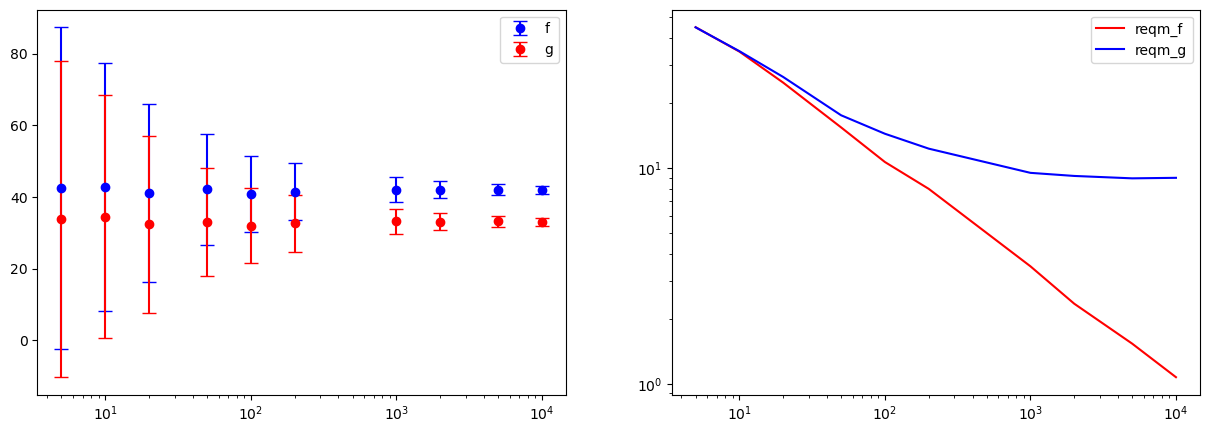

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].errorbar(n_samples, list_mean_f, yerr=list_std_f, fmt='o', color='b', capsize=5, label = 'f')
axs[0].errorbar(n_samples, list_mean_g, yerr=list_std_g, fmt='o', color='r', capsize=5, label = 'g')
axs[0].set_xscale('log')  # Appliquer l'échelle logarithmique
axs[1].plot(n_samples, list_reqm_f, label = 'reqm_f', color = 'r')
axs[1].plot(n_samples, list_reqm_g, label = 'reqm_g', color = 'b')
axs[1].set_xscale('log') 
axs[1].set_yscale('log')  

for ax in axs:
    ax.legend()
plt.show()

In [17]:
# fig, axs = plt.subplots(1,2, figsize=(15,5))

# axs[0].errorbar(n_samples, list_mean_f, yerr=list_std_f, fmt='o', color='b', capsize=5, label = 'f')
# axs[0].set_xscale('log')  # Appliquer l'échelle logarithmique
# axs[0].set_title("Données f")
# axs[1].errorbar(n_samples, list_mean_g, yerr=list_std_g, fmt='o', color='r', capsize=5, label = 'g')
# axs[1].set_xscale('log')  # Appliquer l'échelle logarithmique
# axs[1].set_title("Données g")
# for ax in axs:
#     ax.legend()
# plt.show()

In [18]:
# fig, axs = plt.subplots(1,2, figsize=(15,5))

# axs[0].errorbar(n_samples, list_mean_f, yerr=list_std_f, fmt='o', color='b', capsize=5, label = 'f')
# axs[0].set_xscale('log')  # Appliquer l'échelle logarithmique
# axs[0].set_title("Données f")
# axs[1].errorbar(n_samples, list_mean_g, yerr=list_std_g, fmt='o', color='r', capsize=5, label = 'g')
# axs[1].set_xscale('log')  # Appliquer l'échelle logarithmique
# axs[1].set_title("Données g")
# for ax in axs:
#     ax.legend()
# plt.show()